In [2]:
import argparse
import pathlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import DateFormatter
import numpy as np
from asammdf import MDF
import csv
import glob
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
import sys

In [3]:
csv_input_path = '/Testdata_csv'
mf4_input_path = '/Testdata_mf4'

driver = dict()
trips = dict()
max_trip_delta = 5 * 60 * 1000000000  # 5 minutes
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = file.split('_')[0]
    if id not in driver:
        driver[id] = []
    driver[id].append(timestamp)

for d in driver:
    driver[d].sort()
    new_trip = True
    trips[d] = []
    tlast = float(driver[d][0])
    for ts in driver[d]:
        t = float(ts)
        if new_trip:
            trips[d].append([])
            new_trip = False
        if (t - tlast) > max_trip_delta:
            tlast = t
            new_trip = True
        else:
            trips[d][-1].append(ts)
            tlast = t


In [3]:
print('=====Driver IDs=====')
ids = []
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    if id not in ids:
        ids.append(id)

print('\n'.join(ids))
print('count: %d' % len(ids))

=====Driver IDs=====
d86e7d74-cfc8-4dba-b131-23a4d66c0120
80fbe7f8-b8e5-44d8-a6ad-1c5b06cb977b
d0fe3a02-2962-4672-99e6-98f95570fe81
018f3bc6-9e84-4d33-a12c-327c08bc01ec
d7a094a5-c7ef-44c6-88eb-907fdf7a235e
d8b14145-ceab-488d-89ac-f689cc08f221
21e985c1-be16-49f7-8e14-f4a0a905aa17
8c52290b-423f-4722-bf9b-1742e064bbfa
fa525c66-41ab-431e-8b48-3cd15e3748a5
657d5398-c4d7-42e7-8d27-0e7700128bfd
count: 10


In [4]:
print('=====Print time values====')
id_to_time = dict()
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = file.split('_')[0]
    ts = int(timestamp)/1000000000

    if id not in id_to_time:
        id_to_time[id] = []

    id_to_time[id].append(timestamp)

# print(id_to_time)

=====Print time values====


=====Plot all trips=====


Text(0.5, 1.0, 'Trips')

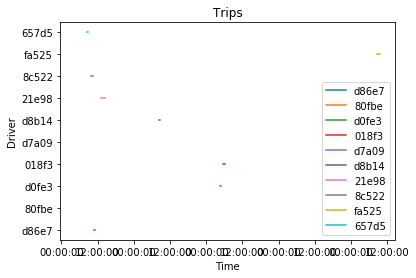

In [5]:
print('=====Plot all trips=====')
plt.figure(1)
ax = plt.subplot()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

for d in trips:
    ts = []
    for trip in trips[d]:
        for t in trip:
            tt = datetime.fromtimestamp(int(int(t)/1000000000))
            ts.append(tt)
        plt.plot(ts[:-1], np.array([d[:5]] * len(ts[:-1])), label=d[:5])
        break

plt.legend()
plt.ylabel('Driver')
plt.xlabel('Time')
plt.title('Trips')

=====Total trip time=====
ID: d86e7, trip count: 39, total trip time: 10.932293 h
ID: 80fbe, trip count: 44, total trip time: 15.437394 h
ID: d0fe3, trip count: 48, total trip time: 21.687338 h
ID: 018f3, trip count: 36, total trip time: 13.487218 h
ID: d7a09, trip count: 50, total trip time: 11.170827 h
ID: d8b14, trip count: 34, total trip time: 13.145112 h
ID: 21e98, trip count: 41, total trip time: 27.362192 h
ID: 8c522, trip count: 46, total trip time: 16.359794 h
ID: fa525, trip count: 41, total trip time: 15.948929 h
ID: 657d5, trip count: 42, total trip time: 16.179663 h


Text(0.5, 1.0, 'Total Trip Times')

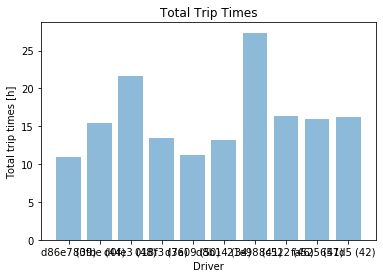

In [6]:
print('=====Total trip time=====')
total_trip_times = []
for d in trips:
    total_trip_time = 0
    for t in trips[d]:
        if len(t) == 0:
            continue
        total_trip_time += float(t[-1]) - float(t[0])
    total_trip_time = (
        total_trip_time + 2 * 60 * 1000000000) / (60 * 60 * 1000000000)
    total_trip_times.append(total_trip_time)
    print('ID: %s, trip count: %d, total trip time: %f h' %
          (d[:5], len(trips[d]), total_trip_time))

# plot it
plt.figure(2)
y_pos = np.arange(len(trips))
x_lables = [('%s (%d)' % (t[:5], len(trips[t]))) for t in trips]
plt.bar(y_pos, np.array(total_trip_times), align='center', alpha=0.5)
plt.xticks(y_pos, x_lables)
plt.ylabel('Total trip times [h]')
plt.xlabel('Driver')
plt.title('Total Trip Times')

In [7]:
print('=====Days of trips=====')
driver = dict()
for file in os.listdir(mf4_input_path):
    id = file.split('_')[1].split('.')[0]
    timestamp = float(file.split('_')[0])
    if id not in driver:
        driver[id] = []
    driver[id].append(datetime.fromtimestamp(timestamp/1000000000).strftime('%d.%m.%Y'))

for d in driver:
    # remove duplicates
    driver[d].sort()
    driver[d] = list(dict.fromkeys(driver[d]))
    print('Driver: %s, Days: %s' % (d[:5], ' '.join(driver[d])))

=====Days of trips=====
Driver: d86e7, Days: 13.07.2019 14.07.2019 15.07.2019 16.07.2019 17.07.2019 18.07.2019 19.07.2019 20.07.2019 22.07.2019 23.07.2019 24.07.2019 25.07.2019 26.07.2019
Driver: 80fbe, Days: 13.07.2019 15.07.2019 16.07.2019 17.07.2019 18.07.2019 19.07.2019 20.08.2019 21.08.2019 22.07.2019 23.07.2019 25.07.2019 26.07.2019 27.07.2019
Driver: d0fe3, Days: 03.08.2019 04.08.2019 05.08.2019 06.08.2019 15.07.2019 16.07.2019 17.07.2019 18.07.2019 19.07.2019 22.07.2019 23.07.2019 24.07.2019 25.07.2019
Driver: 018f3, Days: 01.08.2019 02.08.2019 12.08.2019 15.07.2019 16.07.2019 17.07.2019 18.07.2019 19.07.2019 22.07.2019 23.07.2019 24.07.2019 25.07.2019 28.07.2019
Driver: d7a09, Days: 01.08.2019 02.08.2019 03.08.2019 04.08.2019 13.07.2019 14.07.2019 15.07.2019 23.07.2019 24.07.2019 25.07.2019 26.07.2019 30.07.2019 31.07.2019
Driver: d8b14, Days: 14.07.2019 15.07.2019 16.07.2019 17.07.2019 18.07.2019 19.07.2019 20.07.2019 21.07.2019 23.07.2019 24.07.2019 25.07.2019 26.07.2019 29.

In [ ]:
i = 100
for d in trips:
    for trip in trips[d]:
        data_points = []
        ts = []

        for t in trip:
            start_time = int(float(t) / 1000000000)
            file_name = os.path.join(csv_input_path, '%s_%s.ChannelGroup_*_ESP_21:.csv' % (t, d))
            file = glob.glob(file_name)[0]
            with open(file) as csv_file:
                csv_reader = list(csv.reader(csv_file, delimiter=','))
                for row in csv_reader[1:]:
                    x = start_time + float(row[0])
                    ts.append(datetime.fromtimestamp(x))
                    data_points.append(float(row[1]))

        plt.figure(i)
        ax = plt.subplot()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        plt.plot(np.array(ts), np.array(data_points))
        plt.ylabel('Velocity [km/h]')
        plt.xlabel('Time')
        plt.title('Velocity %s' % d[:5])
        i += 1
        break
    break
        

=====Signal frequences=====
KBI_Tankfuellstand_Prozent: 1.02 Hz
MO_Fahrpedalrohwert_01: 50.01 Hz
ESP_Fahrer_bremst: 49.91 Hz
ESP_Bremsdruck: 49.91 Hz
ESP_Querbeschleunigung: 49.91 Hz
ESP_Laengsbeschl: 49.91 Hz
ESP_Gierrate: 49.91 Hz
ESP_VZ_Gierrate: 49.91 Hz
LV_Tagfahrlicht_Anzeige: 1.02 Hz
LV_Standlicht_Anzeige: 1.02 Hz
LV_Abblendlicht_Anzeige: 1.02 Hz
LV_Fernlicht_Anzeige: 1.02 Hz
LV_Nebellicht_Anzeige: 1.02 Hz
LV_Nebelschlusslicht_Anzeige: 1.02 Hz
BH_Lichthupe: 10.05 Hz
Wischer_vorne_aktiv: 10.05 Hz
BH_Fernlicht: 10.05 Hz
BH_Blinker_li: 10.05 Hz
BH_Blinker_re: 10.05 Hz
BCM1_Aussen_Temp_ungef: 10.05 Hz
ESP_v_Signal: 49.91 Hz
KBI_Kilometerstand_2: 1.02 Hz
KBI_Aussen_Temp_gef: 1.02 Hz
FS_Temp_Sensor: 2.02 Hz
FS_Luftfeuchte_rel: 2.02 Hz
ND_UTC: 5.02 Hz
AB_Gurtschloss_FA: 5.02 Hz
AB_Gurtschloss_BF: 5.02 Hz
AB_Gurtschloss_Reihe2_FA: 5.02 Hz
AB_Gurtschloss_Reihe2_MI: 5.02 Hz
AB_Gurtschloss_Reihe2_BF: 5.02 Hz
MO_Drehzahl_01: 100.01 Hz
ESP_HL_Radgeschw_02: 99.81 Hz
ESP_HR_Radgeschw_02: 99.81

([<matplotlib.axis.XTick at 0x7f5bf8cde5c0>,
 <a list of 46 Text xticklabel objects>)

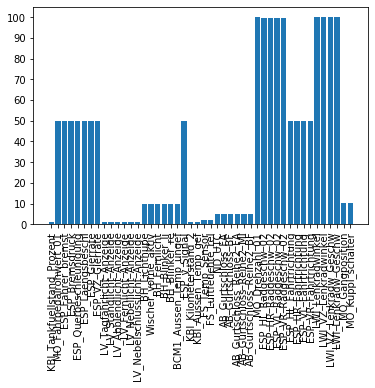

In [4]:
print('=====Signal frequences=====')
file = os.listdir(mf4_input_path)[1]
mdf_file = MDF(os.path.join(mf4_input_path, file))
signals = mdf_file.iter_channels(skip_master=True)
sf = dict()
for signal in signals:
    if len(signal.timestamps) == 0:
        continue
    f = len(signal.timestamps) / (signal.timestamps[-1] - signal.timestamps[0])
    sf[signal.name[5:]] = f
    print('%s: %.2f Hz' % (signal.name[5:], f))

plt.figure(4)
plt.bar(range(len(sf)), list(sf.values()), align='center')
plt.yticks(np.arange(0, max(sf.values()), 10))
plt.xticks(range(len(sf)), list(sf.keys()), rotation='vertical')